In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset 
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)

# data (as pandas dataframes) 
X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets

# metadata 
print(online_shoppers_purchasing_intention_dataset.metadata)

# variable information 
print(online_shoppers_purchasing_intention_dataset.variables) 


{'uci_id': 468, 'name': 'Online Shoppers Purchasing Intention Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/468/data.csv', 'abstract': 'Of the 12,330 sessions in the dataset,\n84.5% (10,422) were negative class samples that did not\nend with shopping, and the rest (1908) were positive class\nsamples ending with shopping.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 12330, 'num_features': 17, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Revenue'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5F88Q', 'creators': ['C. Sakar', 'Yomi Kastro'], 'intro_paper': {'ID': 367, 'type': 'NATIVE', 'title': 'Real-time prediction of online shoppers’ pur

In [3]:
import pandas as pd

In [4]:
features = pd.DataFrame(X)
print(features.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [5]:
targets = pd.DataFrame(y)
print(targets.head())

   Revenue
0    False
1    False
2    False
3    False
4    False


In [6]:
dataset = pd.read_csv("online_shoppers_intention.csv")
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
missing_values_summary = dataset.isnull().sum()
print(missing_values_summary)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [8]:
all_month_values = dataset['Month'].value_counts().sort_index()

print(all_month_values)

Month
Aug      433
Dec     1727
Feb      184
Jul      432
June     288
Mar     1907
May     3364
Nov     2998
Oct      549
Sep      448
Name: count, dtype: int64


In [9]:
all_month_values = dataset['Month'].value_counts().sort_index()

print(all_month_values)

Month
Aug      433
Dec     1727
Feb      184
Jul      432
June     288
Mar     1907
May     3364
Nov     2998
Oct      549
Sep      448
Name: count, dtype: int64


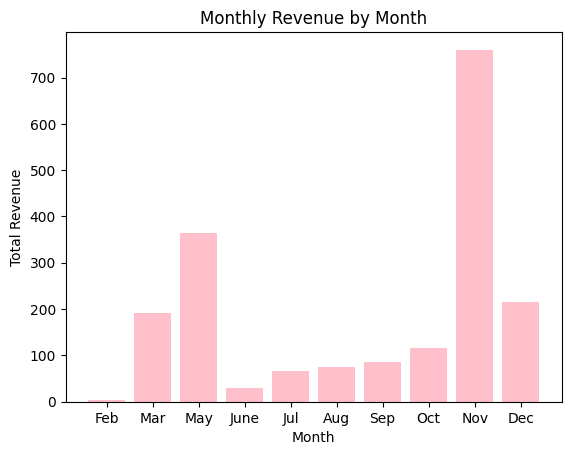

In [10]:
import matplotlib.pyplot as plt
monthly_mean = dataset.groupby('Month')['Revenue'].sum()

month_order = ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_mean = monthly_mean.reindex(month_order, fill_value=0)

plt.bar(month_order, monthly_mean.values, color='pink')
plt.title('Monthly Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

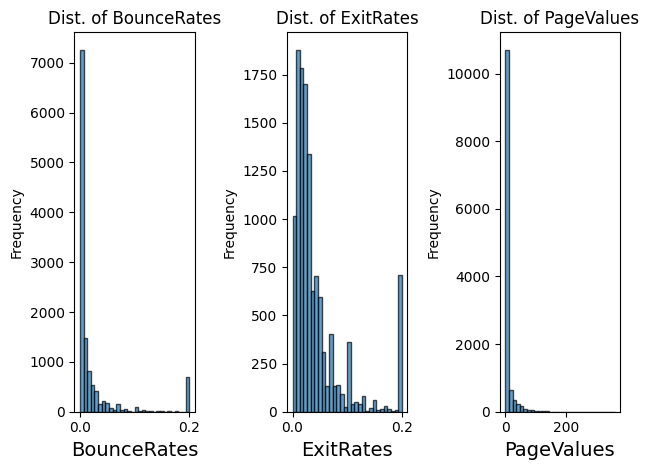

In [11]:
import matplotlib.pyplot as plt

# Focus on BounceRates, ExitRates, and PageValues
focus_columns = ['BounceRates', 'ExitRates', 'PageValues']

for i, col in enumerate(focus_columns, 1):
    plt.subplot(1, 3, i)
    plt.hist(dataset[col], bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Dist. of {col}')
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
missing_Values = dataset.isna().sum()
print(missing_Values)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [13]:
contingency_table = pd.crosstab(dataset['Region'], dataset['Browser'])


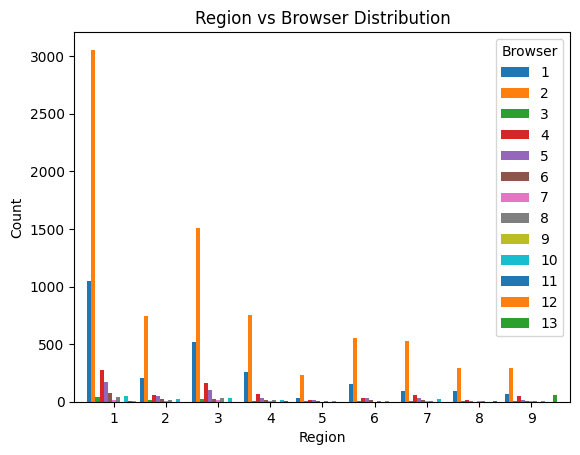

In [14]:
import matplotlib.pyplot as plt

contingency_table.plot(kind= 'bar', width = 1.0)
plt.xticks(rotation=0)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region vs Browser Distribution')
plt.legend(title='Browser')
plt.show()

In [15]:
# We need to do more research on the region and browser relationship.

In [16]:
dataset.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [17]:
non_numeric_columns = dataset.select_dtypes(exclude=['number']).columns

print("Non-numeric columns in the dataset:")
print(non_numeric_columns)

Non-numeric columns in the dataset:
Index(['Month', 'VisitorType', 'Weekend', 'Revenue'], dtype='object')


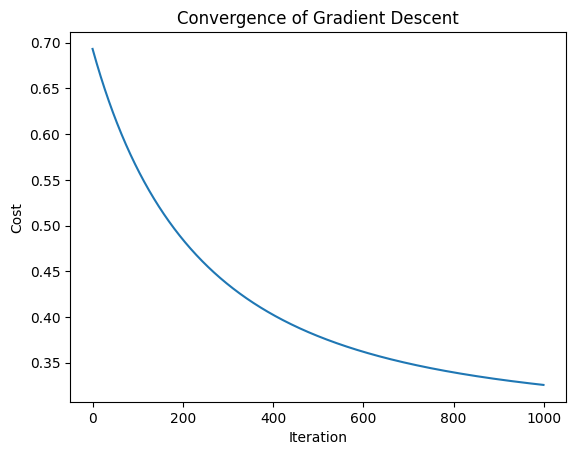

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

data_copy = dataset.copy()
data_encoded = pd.get_dummies(data_copy, columns=['Month', 'VisitorType'], drop_first=False)
data_encoded['Weekend'] = data_encoded['Weekend'].astype(int)
data_encoded['Revenue'] = data_encoded['Revenue'].astype(int)

X = data_encoded.drop('Revenue', axis=1)
y = data_encoded['Revenue']

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent_with_cost(X, y, initial_guess, alpha, n):
    m, n_features = X.shape
    guesses = [initial_guess]
    costs = []
    guess = initial_guess

    for _ in range(n):
        weights = guess[:-1]
        bias = guess[-1]

        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)

        cost = -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))
        costs.append(cost)

        dw = np.dot(X.T, (y_pred - y)) / m
        db = np.sum(y_pred - y) / m

        gradients = np.append(dw, db)
        guess = guess - alpha * gradients

        guesses.append(guess)

    return np.array(guesses), costs


def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)
    return (y_pred > 0.5).astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

n_features = X_train.shape[1]
initial_guess = np.zeros(n_features + 1)
alpha = 0.01
iterations = 1000

guesses, costs = gradient_descent_with_cost(X_train, y_train.values, initial_guess, alpha, iterations)
final_params = guesses[-1]

final_weights = final_params[:-1]
final_bias = final_params[-1]

# Make predictions
y_test_pred = predict(X_test, final_weights, final_bias)

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

import matplotlib.pyplot as plt

plt.plot(range(len(costs)), costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Convergence of Gradient Descent')
plt.show()

In [19]:
metrics_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Value': [round(accuracy, 3), round(precision, 3), round(recall, 3)]
})


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

dt_classifier.fit(X_train, y_train)

y_test_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

metrics_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Value': [round(accuracy, 3), round(precision, 3), round(recall, 3)]
})

print(metrics_table)

      Metric  Value
0   Accuracy  0.895
1  Precision  0.716
2     Recall  0.531


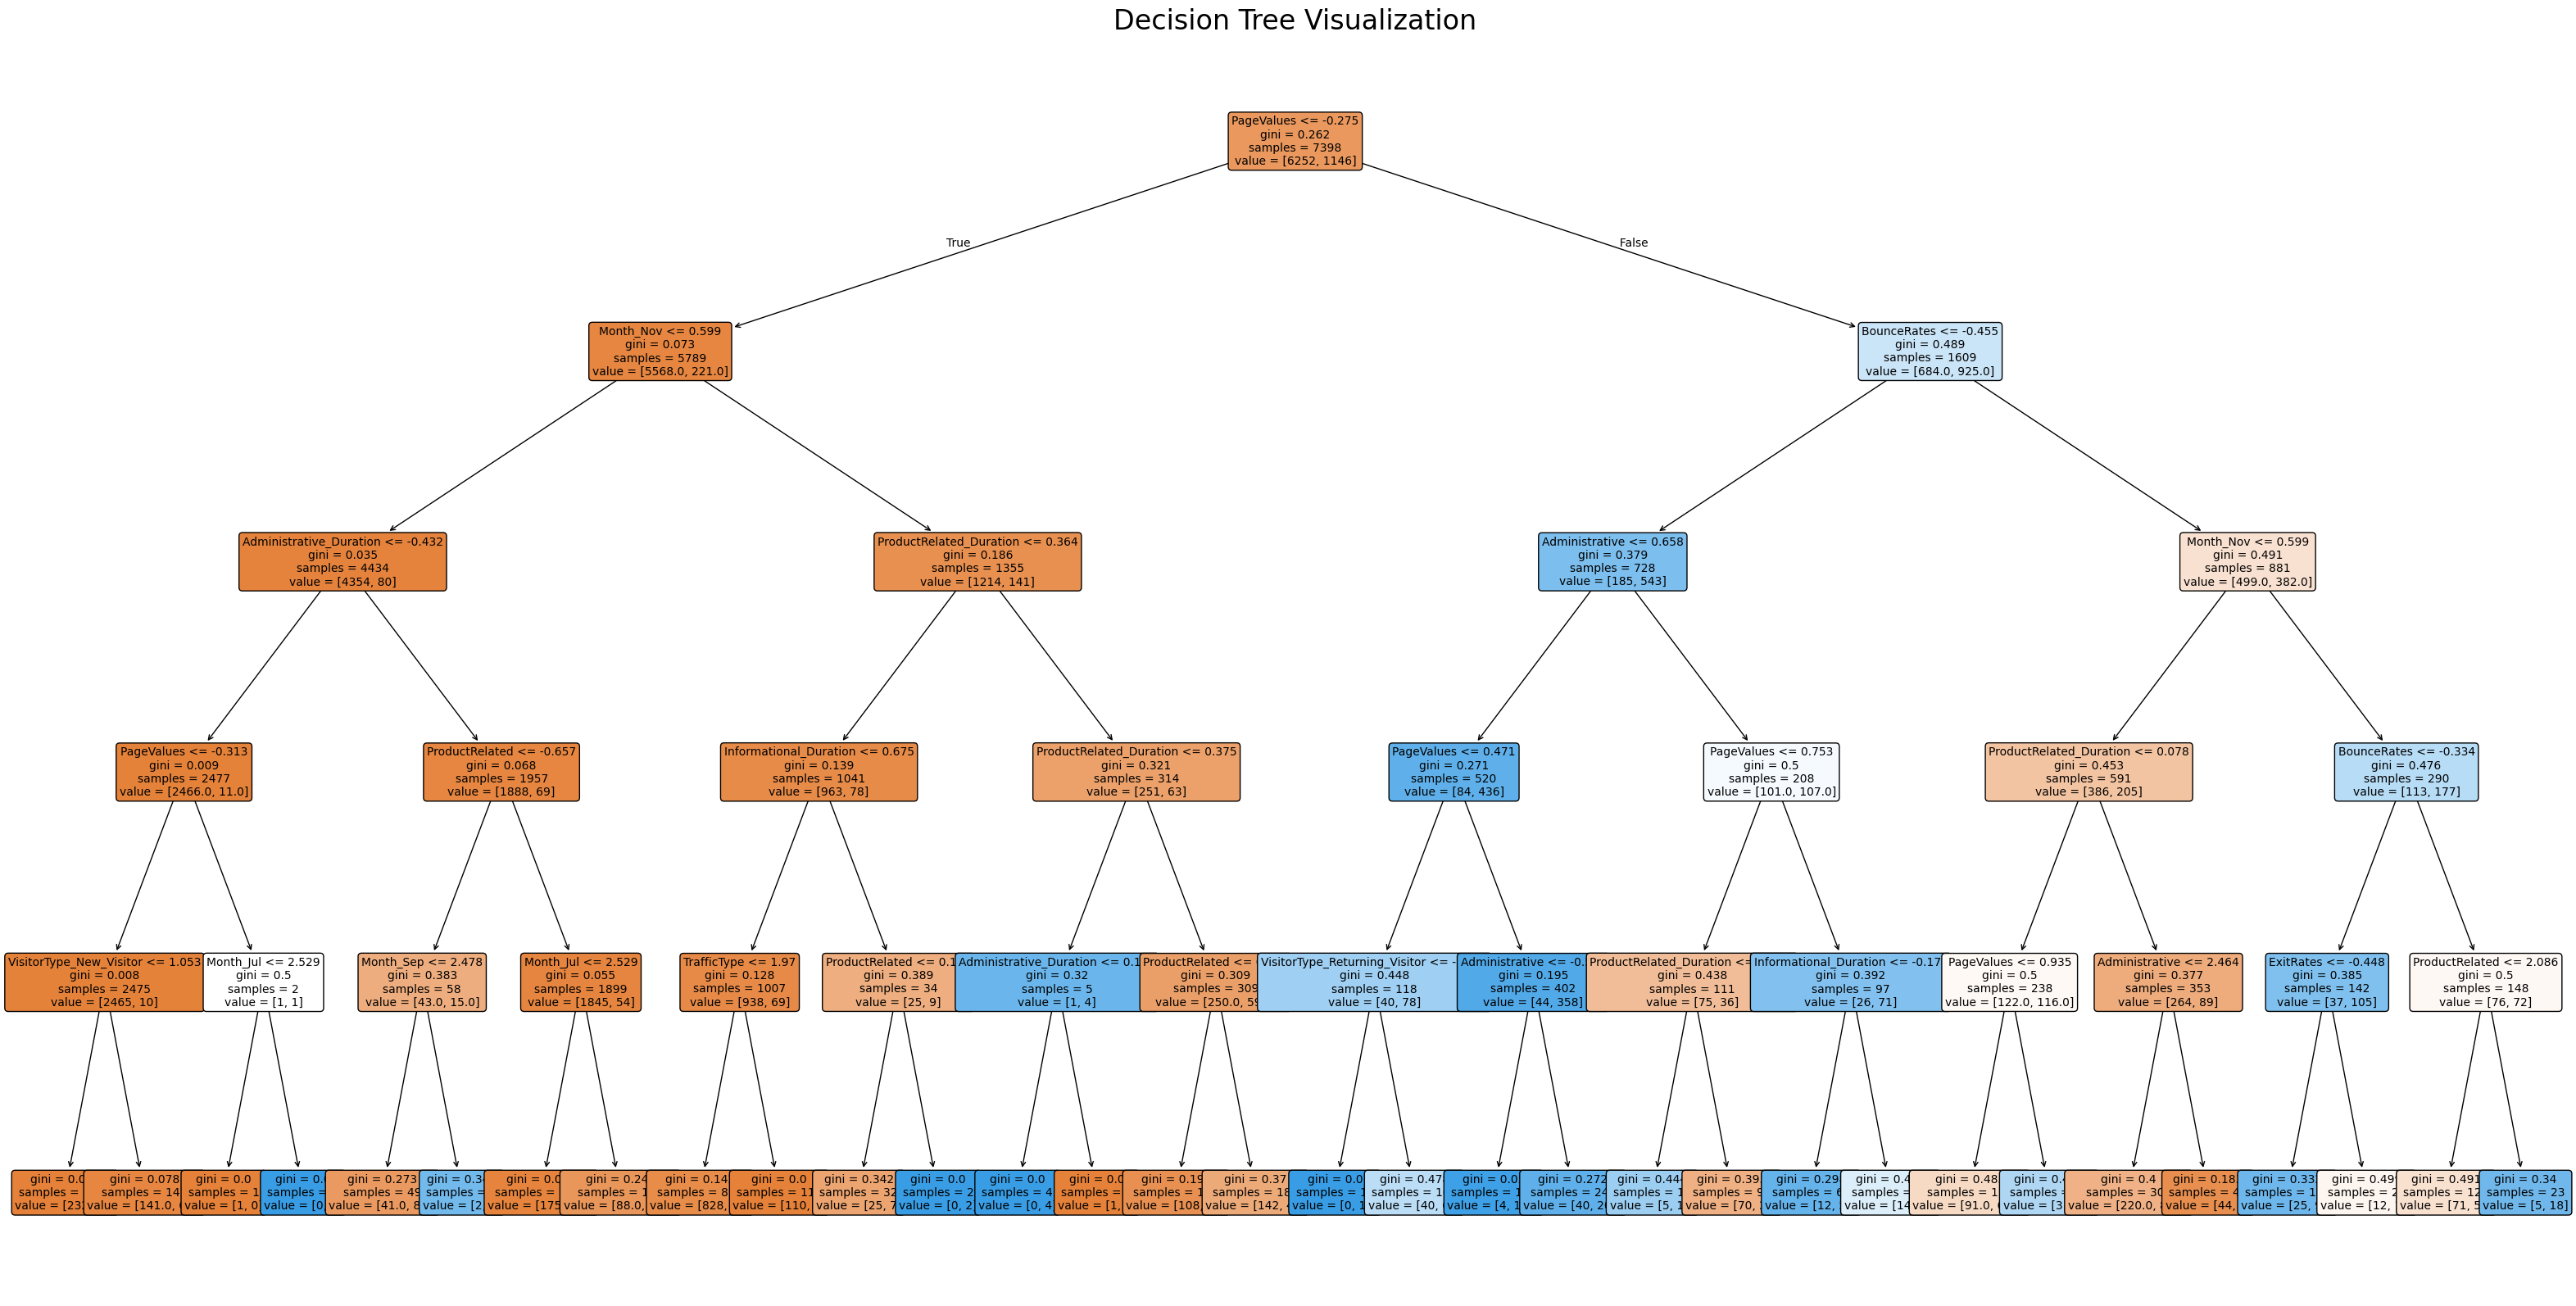

In [21]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40, 20))
plot_tree(
    dt_classifier,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization", fontsize=24)

plt.savefig("decisiontree577.png", dpi=600)
plt.show()

In [22]:
print(data_encoded.columns)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')


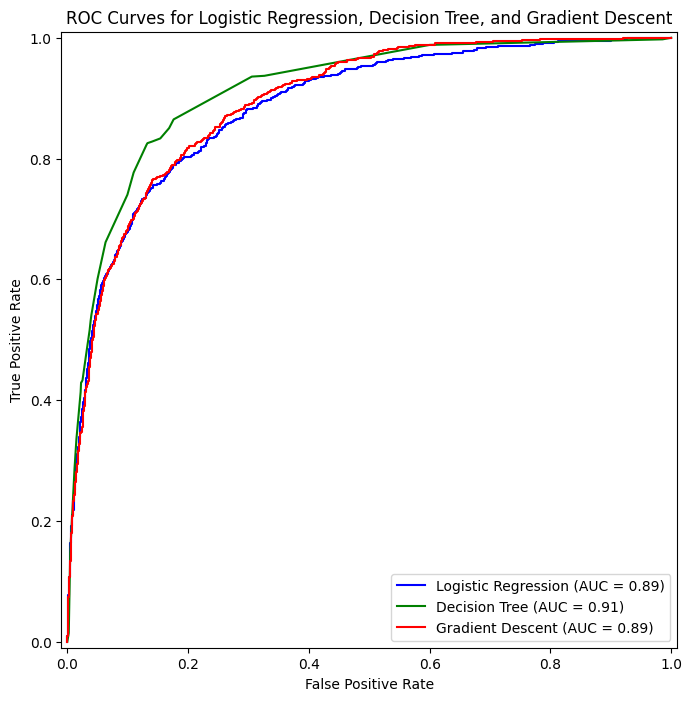

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

log_reg = LogisticRegression(random_state=42, max_iter=2000, solver='lbfgs')

dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

log_reg.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)

guesses, costs = gradient_descent_with_cost(X_train, y_train.values, initial_guess, alpha, iterations)
final_params = guesses[-1]
final_weights = final_params[:-1]
final_bias = final_params[-1]

log_fpr, log_tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
log_display = RocCurveDisplay(fpr=log_fpr, tpr=log_tpr, roc_auc=roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]), estimator_name="Logistic Regression")

tree_fpr, tree_tpr, _ = roc_curve(y_test, dt_classifier.predict_proba(X_test)[:, 1])
tree_display = RocCurveDisplay(fpr=tree_fpr, tpr=tree_tpr, roc_auc=roc_auc_score(y_test, dt_classifier.predict_proba(X_test)[:, 1]), estimator_name="Decision Tree")

grad_probabilities = sigmoid(np.dot(X_test, final_weights) + final_bias)
grad_fpr, grad_tpr, _ = roc_curve(y_test, grad_probabilities)
grad_auc = roc_auc_score(y_test, grad_probabilities)
grad_display = RocCurveDisplay(fpr=grad_fpr, tpr=grad_tpr, roc_auc=grad_auc, estimator_name="Gradient Descent")

plt.figure(figsize=(10, 8))
log_display.plot(ax=plt.gca(), color="blue")
tree_display.plot(ax=plt.gca(), color="green")
grad_display.plot(ax=plt.gca(), color="red")
plt.title("ROC Curves for Logistic Regression, Decision Tree, and Gradient Descent")
plt.show()